<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 5</p><br>

In [1]:
%%time
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nltk.download()
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arianzarifian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
CPU times: user 4.29 s, sys: 1.26 s, total: 5.54 s
Wall time: 13.1 s


##
<span style="font-wight:bold;font-size:20px">1. Text Data analysis:</span> using “lincoln-last-speech.txt” which contains Lincoln’s last public address. Now answer the following questions and include your codes.

##### a) Read the text and store the text in lAddress. Show the first 70 characters from the first element of the text.

In [2]:
speech=open('lincoln-last-speech.txt','r')
speech=speech.read()
speech[:70]

'We meet this evening, not in sorrow, but in gladness of heart. The eva'

##### b) Now we are interested in the words used in his speech. Extract all the words from lAddress, convert all of them to lower case and store the result in vWord. Display first few words.

In [3]:
speech=speech.lower()
tokenizer = RegexpTokenizer(r'\w+')
vWord=tokenizer.tokenize(speech)
vWord[:10]



['we',
 'meet',
 'this',
 'evening',
 'not',
 'in',
 'sorrow',
 'but',
 'in',
 'gladness']

##### c) The words like am, is, my or through are not much of our interest and these types of words are called stop-words. Get all the English stop words and store them in sWord. Display few stop words in your report.

In [4]:
sWords=stopwords.words('english')
sWords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

##### d) Remove all the sWord from vWord and store the result in cleanWord. Display first few clean words.

In [5]:

cleanWord=np.delete(vWord,np.where(np.isin(vWord,sWords)))

cleanWord[:10]



array(['meet', 'evening', 'sorrow', 'gladness', 'heart', 'evacuation',
       'petersburg', 'richmond', 'surrender', 'principal'], dtype='<U15')

##### f) Construct a bar chart showing the count of each words for the 15 most frequently used words.

In [7]:
details

louisiana     18
state         13
government    12
union         11
plan          11
new           11
states        10
proper         8
would          8
question       7
one            6
whether        6
people         6
thousand       5
congress       5
dtype: int64

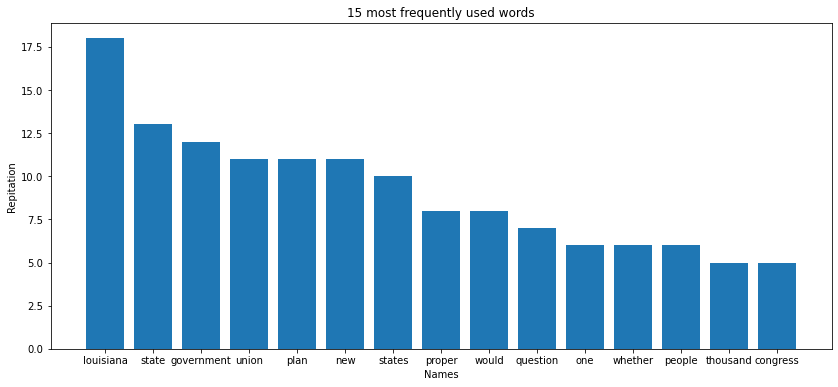

In [6]:
df=pd.Series(cleanWord)
# define details to calculate repetition of words
details=df.value_counts().head(15)
# number of repetition of each word
y=list(details.values)
# word
x=list(details.index)

plt.figure(figsize=(14,6))
plt.bar(x,y)
plt.ylabel('Repitation')
plt.xlabel('Names')
plt.title('15 most frequently used words')

plt.show()

##### h) The plot in question (1f) uses bar plot to display the data. Can you think of another plot that delivers the same information but looks much simpler? Demonstrate your answer by generating such a plot.

<font color='wordcloud can help us to determine most frequent words '></font>


<h2 style="color: red;"> Wordcloud can be helpful as we can determine most frequent words</h2>

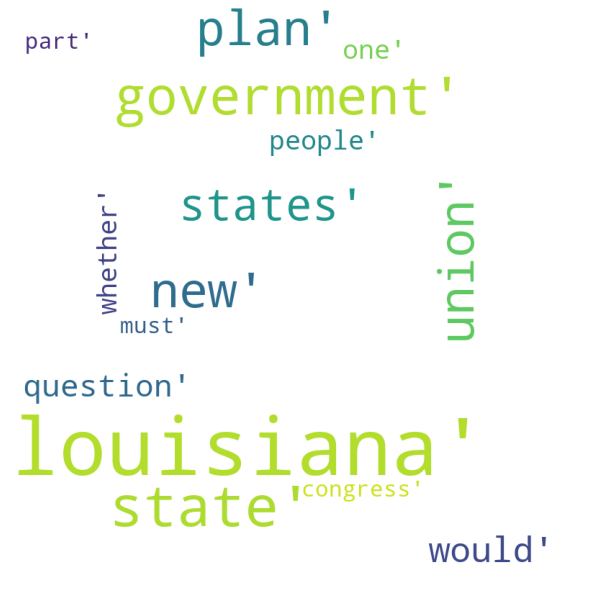

In [8]:
from wordcloud import WordCloud

WordCloud1=WordCloud(width = 800, height = 800,background_color ='white',\
     min_font_size = 4,max_words=15,relative_scaling=1).generate(str(cleanWord))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(WordCloud1)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

##
<span style="font-wight:bold;font-size:20px">2. Answering Questions from Data:</span> Download the data from [ 
https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/flights.csv ]. Answer the following questions using this data.


In [9]:
df=pd.read_csv('flights.csv')
df.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


##### a) What month had the highest proportion of cancelled flights? What month had the lowest? Interpretany seasonal patterns. Please produce a plot that illustrates the proportion of cancelled flights for each month.

<h2 style="color: red;"> when we talk about percentages, pie chart will be useful</h2>

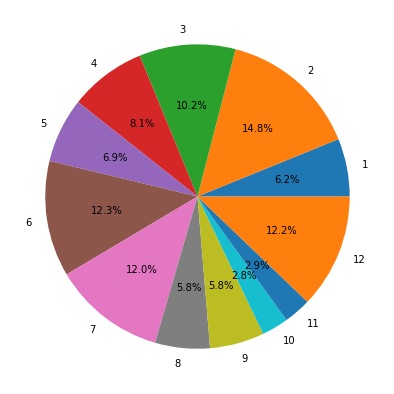

In [10]:
# 'arr_time' to be used to select cancelled flight
df_monthGrouped=df[df['arr_time'].isna()].groupby('month',as_index=False).size()
# define new column to calculate proportion of the months
df_monthGrouped['proportion']=(df_monthGrouped['size']/df_monthGrouped['size'].sum())*100
plt.figure(figsize=(7,7))
plt.pie(df_monthGrouped['proportion'],labels=df_monthGrouped['month'],autopct='%.1f%%')

plt.show()



##### b) What plane (specified by the tailnum variable) traveled the most times from New York City airports in 2013? Plot the number of trips per week over the year.

In [11]:
# we should remove null values first
df_clean=df.dropna()
# to find the plane which had the highest number of travels
df_clean_plane=df_clean.groupby(by=('tailnum')).size().idxmax()
df_clean_plane

'N725MQ'

<h2 style="color: red;"> First plot => just one plane N725MQ</h2>

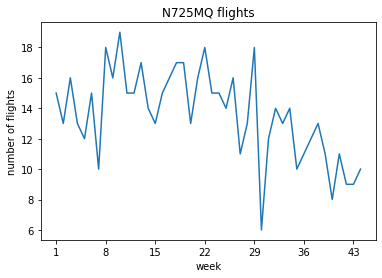

In [12]:
# change type of data
df['time_hour']=pd.to_datetime(df['time_hour'])
# define new column
df['week']=df['time_hour'].dt.isocalendar().week
# grouping data based on the name of planes and weeks
df_tailnum=df.groupby(['tailnum','week'],as_index=False).size()
# select the plane
df_N725MQ=df_tailnum.loc[df_tailnum['tailnum']=='N725MQ']
plt.plot(df_N725MQ['week'],df_N725MQ['size'])
plt.xlabel('week')
plt.ylabel('number of flights')
plt.title('N725MQ flights')
plt.xticks(np.arange(df_N725MQ['week'].min(),df_N725MQ['week'].max(),7))
plt.show()



<h2 style="color: red;"> second plot => all flights per week</h2>

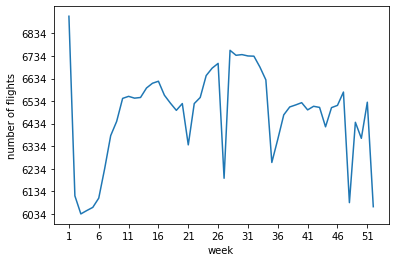

In [13]:

df_flights=df.groupby('week',as_index=False).size()
plt.plot(df_flights['week'],df_flights['size'])
plt.xlabel('week')
plt.ylabel('number of flights')
plt.xticks(np.arange(df_flights['week'].min(),df_flights['week'].max(),5))
plt.yticks(np.arange(df_flights['size'].min(),df_flights['size'].max(),100))

plt.show()



##### c) Download the plane data from [ https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/planes.csv ]. Use the flights and planes tables to answer the following questions: What is the oldest plane (specified by the tailnum variable) that flew from New York City airports in 2013? How many airplanes that flew from New York City are included in the planes table?

In [60]:
df_plane=pd.read_csv('planes.csv')
old_plane=df_plane.merge(df,how='inner',on='tailnum')
old_plane.sort_values('year_x').head(1)


,tailnum,year_x,type,manufacturer,model,engines,seats,speed,engine,year_y,...,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour,week
119798,N381AA,1956.0,Fixed wing multi engine,DOUGLAS,DC-7BF,4,102,232.0,Reciprocating,2013,...,AA,1769,JFK,MIA,168.0,1089,15,5,2013-07-02 15:00:00,27


##### d) Use the flights and planes tables to answer the following questions: How many planes have a missing date of manufacture? What are the five most common manufacturers (Note: pay close attention to the same manufacturer being represented multiple times)? Has the distribution of manufacturer changed over time as reflected by the airplanes flying from NYC in 2013? Produce a plot that backs up your claim.

<h2 style="color: red;"> to understand how many planes produced by each company</h2>

In [17]:

manufacturers=df_plane.groupby('manufacturer',as_index=False).size()\
    .sort_values(by='size',ascending=False)

manufacturers.head(10)

,manufacturer,size
9,BOEING,1630
2,AIRBUS INDUSTRIE,400
10,BOMBARDIER INC,368
1,AIRBUS,336
17,EMBRAER,299
27,MCDONNELL DOUGLAS,120
28,MCDONNELL DOUGLAS AIRCRAFT CO,103
29,MCDONNELL DOUGLAS CORPORATION,14
13,CESSNA,9
11,CANADAIR,9


<h2 style="color: red;"> we used top companies  </h2>

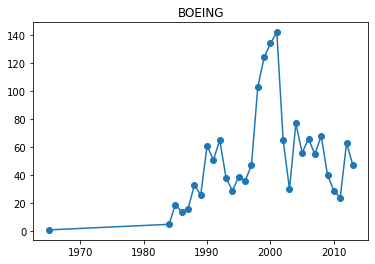

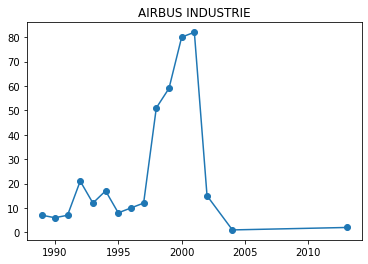

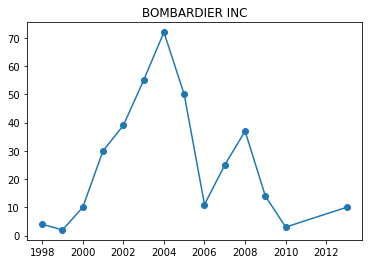

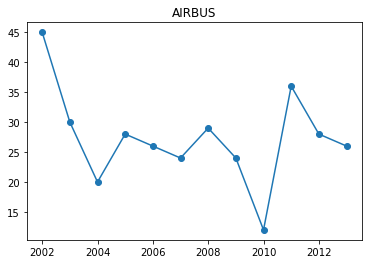

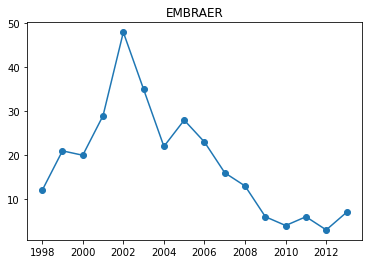

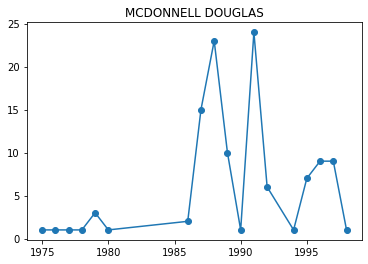

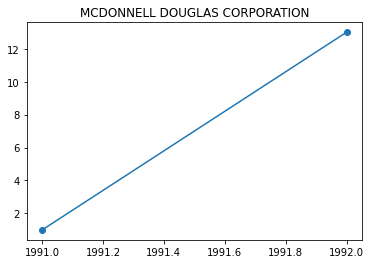

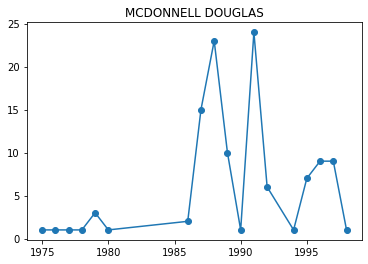

In [19]:
companies=['BOEING','AIRBUS INDUSTRIE','BOMBARDIER INC','AIRBUS','EMBRAER','MCDONNELL DOUGLAS','MCDONNELL DOUGLAS CORPORATION','MCDONNELL DOUGLAS']
# make a df to find out how many plane produced by a company per year
years_df=df_plane.groupby('year',as_index=False).size()
companies_year=df_plane.groupby(['manufacturer','year']).size()
for i in companies:
    company=companies_year[i]
    x=company.index
    y=company.values
    plt.title(i)
    plt.plot(x,y,marker='o')
    plt.show()



<h2 style="color: red;"> at this point: max number produced by a company in the year was compared to totoal number of planes  </h2>

In [22]:
import matplotlib.patches as mpatches
Distribution=df_plane.groupby(['year','manufacturer']).size()
# to determine which company had the highest  number of palnes in a year
Distribution_max=Distribution.loc[Distribution.groupby(level='year').idxmax()]
# make a df
year_names=Distribution_max.index
year_names_df=pd.DataFrame(year_names,columns=['company'])
year_names_df['numbers']=Distribution_max.values
year_names_df.head()

,company,numbers
0,"(1956.0, DOUGLAS)",1
1,"(1959.0, CESSNA)",1
2,"(1963.0, CESSNA)",2
3,"(1965.0, BOEING)",1
4,"(1967.0, BEECH)",1


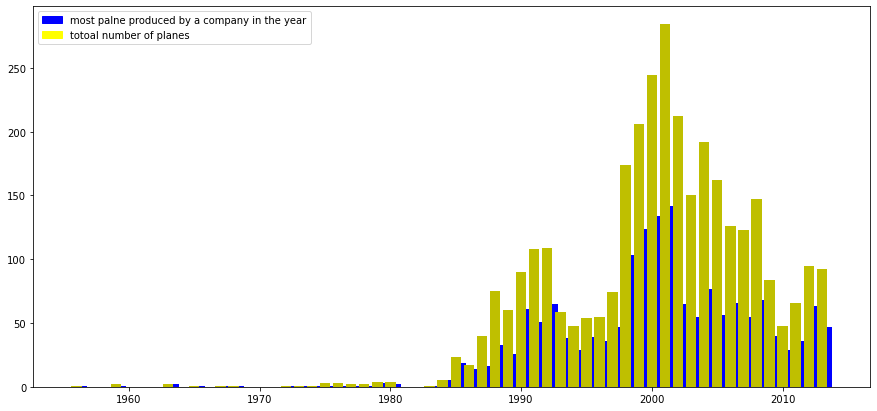

In [153]:

# the final df
year_names_df[['year','name_company']]=pd.DataFrame(year_names_df['company'].tolist(), index=year_names_df.index)
plt.figure(figsize=(15,7))
p1=plt.bar(year_names_df.year,year_names_df.numbers,align='edge',color='b')
p2=plt.bar(year_names_df.year,years_df['size'],align='center',color='y')
yellow_patch = mpatches.Patch(color='yellow', label='totoal number of planes')
blue_patch = mpatches.Patch(color='blue', label='max number produced by a company in the year')

plt.legend(handles=[blue_patch, yellow_patch])

plt.show()



<h2 style="color: red;"> conclusion:  The companies with the highest number of productions have achieved this success in recent years, while the companies with lower productions were present in the first years, this declare that the old companies have lost the competition.    </h2>

##
<span style="font-wight:bold;font-size:20px">3. Regular Expressions:</span> Write a regular expression to match patterns in the following strings. Demonstrate
that your regular expression indeed matched that pattern by including codes and results.

##### a) We have a list vText as follows. Write a regular expression that matches g, og, go or ogo in vText and replace the matches with ‘.’.

In [23]:
import re

In [24]:
vText = ['google','logo','dig', 'blog', 'boogie']
for i in vText:
    print(re.sub('(o)?g(o)?','..',i))

....le
l..
di..
bl..
bo..ie


##### b) Replace only the 5 or 6 digit numbers with the word “found” in the following list. Please make sure that 3, 4, or 7 digit numbers do not get changed.

In [25]:
vPhone = ['874','6783','345345', '32120', '468349', '8149674']
for i in vPhone:
    print(re.sub('(5|6)','found',i))


874
found783
34found34found
32120
4found8349
8149found74


##### c) Replace all the characters that are not among the 26 English characters or a space. Please replace with an empty spring.

In [26]:
myText = "#y%o$u @g!o*t t9h(e) so#lu!tio$n c%or_r+e%ct"
print(re.sub('[^a-zA-Z ]','',myText))


you got the solution correct


##### d) In the following text, replace all the words that are exactly 3 or 4 characters long with triple dots ‘. . . ’

In [27]:
myText1 = "Each of the three and four character words will be gone now"
print(re.sub(r'\b([a-z]{3,4})\b','...',myText1))

Each of ... three ... ... character words ... be ... ...


##### e) Extract all the three numbers embedded in the following text.

In [28]:
bigText = 'There are four 20@14 numbers hid989den in the 500 texts'
match=re.findall(r'[0-9]{3}',bigText)
print(match)

['989', '500']


##### f) Extract all the words between parenthesis from the following string text and count number of words.

In [32]:
myText3 = 'The salries are reported (in millions) for every company.'
match=re.findall(r'\((.*)\)',myText3)
print(match,len(match))

['in millions'] 1


##### g) Extract the texts in between _ and dot(.) in the following list. Your output should be ‘bill’, ‘pay’, ‘fine-book’.

In [38]:
myText4 = ["H_bill.xls", "Big_H_pay.xls", "Use_case_fine-book.pdf"]
for i in myText4:
    match=re.findall(r'(?:\_([^.]*)\.)',i)
    print(match)

['bill']
['H_pay']
['case_fine-book']


##### h) Extract the numbers (return only integers) that are followed by the units ‘ml’ or ‘lb’ in the following text.

In [46]:
myText5 = 'Received 10 apples with 200ml water at 8pm with 15 lb meat and 2lb salt'
match=re.findall(r'(\d+(?=ml|lb))',myText5)
print(match)


['200', '2']


##### i) Extract only the word in between pair of symbols \\$. Count number of words you have found between pairs of dollar sign \\$

In [39]:
myText6 = 'Math symbols are $written$ in $between$ dollar $signs$'
match=re.findall(r'(?<=\$)(.*?)(?=\$)',myText6)
print(match)


['written', ' in ', 'between', ' dollar ', 'signs']


##### j) Extract all the valid equations in the following text.

In [47]:
myText7 = 'equation1: 2+3=5, equation2 is: 2*3=6, do not extract 2w3=6'

match=re.findall(r'(\d+[+\-*\/]\d+=\d+)',myText7)
print(match)

['2+3=5', '2*3=6']
